
📌 Step 1: Understanding the problem
This project aims to predict Bitcoin's closing price based on historical data.

📌 Step 2: Data loading and exploration

🔍 First rows of the dataset:
      Open     High      Low    Volume    Close
0  6520.48  6520.48  6520.14  0.092154  6520.14
1   627.00   627.00   625.99  1.604823   627.00
2   352.01   352.01   352.00  0.702997   352.00
3   691.00   697.73   690.00  3.894570   690.78
4  5732.11  5732.11  5732.11  0.083204  5732.11

📊 Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1000 non-null   float64
 1   High    1000 non-null   float64
 2   Low     1000 non-null   float64
 3   Volume  1000 non-null   float64
 4   Close   1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB
None


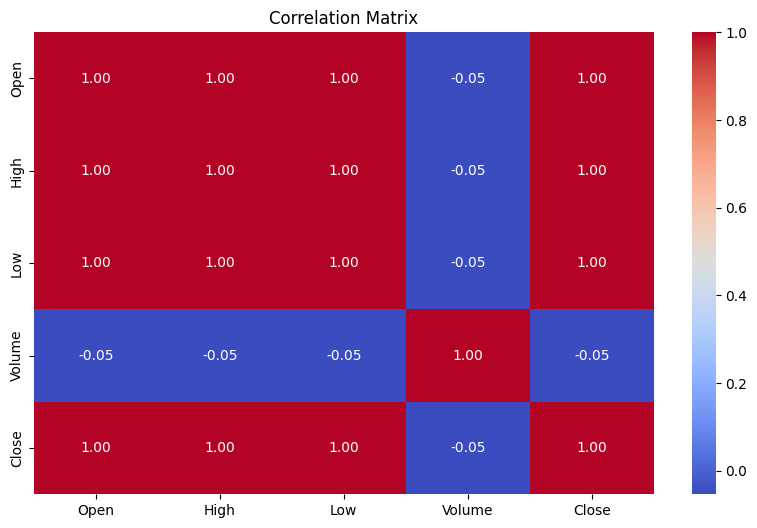


📌 Step 3: Data preprocessing
✅ Data successfully preprocessed.

📌 Step 4: Model training
✅ Model trained successfully.

📌 Step 5: Model evaluation
📉 MAE: 35.98
📉 MSE: 10835.87
📈 R²: 1.00

📌 Step 6: Saving the model
✅ Model saved at: ../models/bitcoin_model.joblib


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# **Step 1: Understanding the problem**
print("\n📌 Step 1: Understanding the problem")
print("This project aims to predict Bitcoin's closing price based on historical data.")

# **Step 2: Data loading and exploration**
print("\n📌 Step 2: Data loading and exploration")
file_path = "../data_sample/bitcoin_sample.csv"
df = pd.read_csv(file_path)

print("\n🔍 First rows of the dataset:")
print(df.head())
print("\n📊 Dataset information:")
print(df.info())

# **Correlation visualization**
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# **Step 3: Data preprocessing**
print("\n📌 Step 3: Data preprocessing")
df = df[["Open", "High", "Low", "Volume", "Close"]]
X = df.drop(columns=["Close"])
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data successfully preprocessed.")

# **Step 4: Model training**
print("\n📌 Step 4: Model training")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
print("✅ Model trained successfully.")

# **Step 5: Model evaluation**
print("\n📌 Step 5: Model evaluation")
y_pred = rf_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"📈 R²: {r2:.2f}")

# **Step 6: Saving the model**
print("\n📌 Step 6: Saving the model")
model_path = "../models/bitcoin_model.joblib"
joblib.dump(rf_model, model_path)
print(f"✅ Model saved at: {model_path}")
